Python SDK for Gemini API

In [ ]:
!pip install -q -U google-generativeai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.9/163.9 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 718.3/718.3 kB 9.3 MB/s eta 0:00:00


Packages

In [ ]:
import pathlib
import textwrap

import google.generativeai as genai #to call gemini models

from IPython.display import display
from IPython.display import Markdown

def to_markdown(text):
  text = text.replace(';', '*')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _:True))

Get API key

In [ ]:
#store API key
from google.colab import userdata

In [ ]:
GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY')

genai.configure(api_key=GOOGLE_API_KEY)

List models in Gemini

In [ ]:
for models in genai.list_models():
  if 'generateContent' in models.supported_generation_methods:
    print(models.name)

models/gemini-1.0-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-latest
models/gemini-1.0-pro-vision-latest
models/gemini-1.5-flash
models/gemini-1.5-flash-001
models/gemini-1.5-flash-latest
models/gemini-1.5-pro
models/gemini-1.5-pro-001
models/gemini-1.5-pro-latest
models/gemini-pro
models/gemini-pro-vision


### Generate text from text inputs

In [ ]:
model = genai.GenerativeModel('models/gemini-1.5-pro-latest')

In [ ]:
model

genai.GenerativeModel(
    model_name='models/gemini-1.5-pro-latest',
    generation_config={},
    safety_settings={},
    tools=None,
    system_instruction=None,
    cached_content=None
)

In [ ]:
%%time
response = model.generate_content("How to be content in life?")

CPU times: user 268 ms, sys: 30.5 ms, total: 299 ms
Wall time: 17.5 s


In [ ]:
response

response:
GenerateContentResponse(
    done=True,
    iterator=None,
    result=protos.GenerateContentResponse({
      "candidates": [
        {
          "content": {
            "parts": [
              {
                "text": "Contentment is a journey, not a destination. It's about finding peace and satisfaction in the present moment, regardless of external circumstances. While there's no one-size-fits-all answer, here are some strategies that can help you cultivate contentment:\n\n**Shift Your Perspective:**\n\n* **Practice Gratitude:**  Take time each day to appreciate the good things in your life, no matter how small. Keep a gratitude journal, write thank-you notes, or simply reflect on things you're grateful for.\n* **Focus on the Present:**  Dwelling on the past leads to regret, and worrying about the future creates anxiety. Mindfulness practices like meditation can help you stay grounded in the now.\n* **Reframe Negative Thoughts:**  Challenge negative self-talk and try to s

In [ ]:
to_markdown(response.text)

> Contentment is a journey, not a destination. It's about finding peace and satisfaction in the present moment, regardless of external circumstances. While there's no one-size-fits-all answer, here are some strategies that can help you cultivate contentment:
> 
> **Shift Your Perspective:**
> 
> * **Practice Gratitude:**  Take time each day to appreciate the good things in your life, no matter how small. Keep a gratitude journal, write thank-you notes, or simply reflect on things you're grateful for.
> * **Focus on the Present:**  Dwelling on the past leads to regret, and worrying about the future creates anxiety. Mindfulness practices like meditation can help you stay grounded in the now.
> * **Reframe Negative Thoughts:**  Challenge negative self-talk and try to see situations from a more positive perspective. Ask yourself: Is this thought helpful? Is it true? Can I look at this differently?
> * **Set Realistic Expectations:**  Don't fall into the trap of comparing yourself to others or striving for an unrealistic ideal of perfection. Celebrate your accomplishments, big and small.
> * **Embrace Imperfection:** Accept that life is full of ups and downs. It's okay to make mistakes and not have everything figured out. Learn from your experiences and keep moving forward.
> 
> **Nurture Your Wellbeing:**
> 
> * **Prioritize Self-Care:** Engage in activities that nourish your mind, body, and soul. This could include exercise, healthy eating, spending time in nature, pursuing hobbies, or simply taking time for yourself to relax.
> * **Build Strong Relationships:** Nurture meaningful connections with loved ones. Make time for quality time with family and friends who support and uplift you.
> * **Find Your Purpose:**  Engage in activities that give your life meaning and make you feel fulfilled. This could be through work, volunteering, creative pursuits, or anything else that ignites your passion.
> * **Practice Kindness:**  Being kind to yourself and others can boost your overall well-being and sense of contentment. 
> 
> **Simplify Your Life:**
> 
> * **Declutter Your Surroundings:**  A cluttered environment can lead to a cluttered mind. Get rid of things you don't need or use to create a more peaceful and organized space.
> * **Reduce Your Commitments:**  Learn to say no to things that drain your energy or don't align with your values. Protect your time and prioritize activities that truly matter.
> * **Live Within Your Means:** Financial stress can be a major source of discontent. Create a budget, track your spending, and avoid overspending to gain control over your finances.
> * **Disconnect from Technology:** Constant exposure to social media and technology can fuel feelings of inadequacy and dissatisfaction. Set boundaries and make time for digital detox to reconnect with yourself and the present moment.
> 
> **Remember:** Contentment is an ongoing practice. Be patient with yourself, and don't be afraid to seek professional support if you're struggling to find peace and satisfaction in your life. 


In [ ]:
#Check if API failed
response.prompt_feedback

In [ ]:
response.candidates

[content {
  parts {
    text: "Contentment is a journey, not a destination. It\'s about finding peace and satisfaction in the present moment, regardless of external circumstances. While there\'s no one-size-fits-all answer, here are some strategies that can help you cultivate contentment:\n\n**Shift Your Perspective:**\n\n* **Practice Gratitude:**  Take time each day to appreciate the good things in your life, no matter how small. Keep a gratitude journal, write thank-you notes, or simply reflect on things you\'re grateful for.\n* **Focus on the Present:**  Dwelling on the past leads to regret, and worrying about the future creates anxiety. Mindfulness practices like meditation can help you stay grounded in the now.\n* **Reframe Negative Thoughts:**  Challenge negative self-talk and try to see situations from a more positive perspective. Ask yourself: Is this thought helpful? Is it true? Can I look at this differently?\n* **Set Realistic Expectations:**  Don\'t fall into the trap of c

In [ ]:
%%time
response = model.generate_content("How to be content in life?", stream=True)

CPU times: user 267 ms, sys: 20.2 ms, total: 287 ms
Wall time: 16.7 s


In [ ]:
for chunk in response:
  print(chunk.text)
  print("_"*80)

Content
________________________________________________________________________________
ment, that elusive feeling of peaceful satisfaction, isn't a destination, but
________________________________________________________________________________
 a journey. There's no one-size-fits-all answer,
________________________________________________________________________________
 but here are some time-tested strategies to cultivate it:

**1. Shift Your Perspective:**

* **Gratitude Practice:** Regularly acknowledge and appreciate the
________________________________________________________________________________
 good in your life, no matter how small. Keep a gratitude journal, write thank-you notes, or simply reflect on things you're grateful for.
________________________________________________________________________________

* **Focus on the Present:**  Dwelling on the past or worrying about the future steals joy from the present moment. Mindfulness exercises, like meditation or deep

### Generate text from image and text inputs

In [ ]:
!curl -o image.jpg https://150429065.v2.pressablecdn.com/wp-content/uploads/2011/01/Gadi-Sagar.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 55735  100 55735    0     0   212k      0 --:--:-- --:--:-- --:--:--  213k


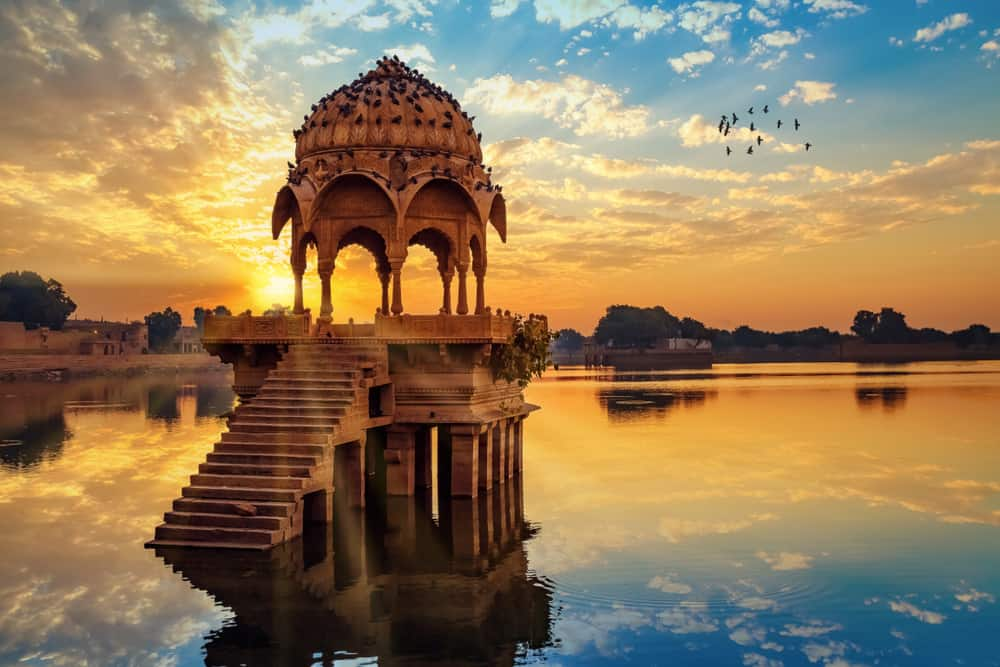

In [ ]:
import PIL.Image

img = PIL.Image.open('image.jpg')
img

In [ ]:
model = genai.GenerativeModel('gemini-pro-vision')

In [ ]:
response = model.generate_content(img)
to_markdown(response.text)

>  This is a beautiful picture of a lake in India. The water is calm and still, and the sky is a clear blue. The setting sun casts a golden glow over the scene. There is a small temple in the middle of the lake, and a few trees on the shore. The overall effect is one of peace and tranquility.

In [ ]:
model = genai.GenerativeModel('models/gemini-1.5-flash-latest')

In [ ]:
response = model.generate_content(img)
to_markdown(response.text)

> This image shows a beautiful, golden-hued sunrise over a calm lake with a stone pavilion in the middle. The pavilion has a domed roof and intricate arches, and is surrounded by water. The reflection of the pavilion in the lake is perfect, and the sky is filled with vibrant colours of the sunrise.  The silhouette of a flock of birds flying in formation adds a touch of serenity to the scene.

### Providing both text and images in a prompt

In [ ]:
response = model.generate_content(['Write a short engaging blog post based on the picture. Make it engaging and more like a travel story', img], stream=True)
response.resolve()

In [ ]:
to_markdown(response.text)

>  I had the opportunity to visit the beautiful city of Jaisalmer in Rajasthan, India. The city is known for its stunning architecture, including the Jaisalmer Fort, which is a UNESCO World Heritage Site. The fort is built on a hill and overlooks the city. It's an impressive sight, and it's easy to see why it's one of the most popular tourist destinations in India.
> 
> Another highlight of my trip to Jaisalmer was the camel safari. I had never ridden a camel before, but it was an amazing experience. We rode through the desert for hours, and it was a great way to see the unique landscape.
> 
> I also had the chance to visit the Gadisar Lake, which is a large artificial lake located in the heart of the city. The lake is surrounded by temples and palaces, and it's a popular spot for locals and tourists alike.
> 
> Jaisalmer is a beautiful city with a rich history and culture. I'm so glad I had the opportunity to visit it. If you're looking for a unique travel experience, I highly recommend visiting Jaisalmer.